In [75]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Step one: rename "index" column into "stock name"
Step two: clean up missing data
Step three:

In [76]:
stock = pd.read_csv('indexData.csv')

In [77]:
stock

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [78]:
stock.dtypes

Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [79]:
#how many unique stocks
stock['Index'].unique().shape[0]

14

In [80]:
stock

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


# Defining Columns 

* Index: Ticker Symbol for Indexes
* Date: Date of Observation
* Open: Opening Price
* High: Highest price during trading day
* Low: Lowest price during trading day
* Close: Close price adjusted for splits
* Adj Close: Adjusted close price adjusted for both dividends and splits
* Volume: Number of shares traded during trading day

# STEP 1: CLEAN UP DATA/ANALYZE 

In [81]:
# IDENTIFY HOW MANY MISSING VALUES AND CLEAN UP THE MISSING VALUES 
stock.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [82]:
#dropping 2204 rows with null values because the dropped rows will be less than 5% of the total number of rows in the original dataframe
stock.dropna(inplace = True)

In [83]:
stock

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [84]:
#how many unique stocks
stock['Index'].unique().shape[0]

14

In [85]:
#all unique stocks
stock['Index'].unique()

array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

# STEP 2: SPLIT DATA BY STOCK

In [86]:
#converting date column into datetime format
stock['Date'] = pd.to_datetime(stock['Date'])

In [87]:
#Break it up into quarters
#Q1 January 1st - March 31
#Q2 April 1 - June 30
#Q3 July 1 - September 30
#Q4 October 1 - December 31
stock['quarter'] = stock['Date'].dt.to_period('Q')

In [88]:
stock

,Index,Date,Open,High,Low,Close,Adj Close,Volume,quarter
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,1965Q4
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,1966Q1
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,1966Q1
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,1966Q1
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,1966Q1
...,...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0,2021Q2
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0,2021Q2
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0,2021Q2
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0,2021Q2


In [89]:
#calculate change for each day
stock['Diff'] = (stock['Open'] - stock['Adj Close'])
stock

,Index,Date,Open,High,Low,Close,Adj Close,Volume,quarter,Diff
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,1965Q4,0.000000
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,1966Q1,0.000000
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,1966Q1,0.000000
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,1966Q1,0.000000
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,1966Q1,0.000000
...,...,...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0,2021Q2,-5.949951
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0,2021Q2,-7.130005
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0,2021Q2,7.149902
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0,2021Q2,-3.969971


In [90]:
#splitting original dataframe into 14 dataframes by stocks
NYA = stock[stock['Index'] == 'NYA']
IXIC = stock[stock['Index'] == 'IXIC']
HSI = stock[stock['Index'] == 'HSI']
SS = stock[stock['Index'] == '000001.SS']
GSPTSE = stock[stock['Index'] == 'GSPTSE']
SZ = stock[stock['Index'] == '399001.SZ']
NSEI = stock[stock['Index'] == 'NSEI']
GDAXI = stock[stock['Index'] == 'GDAXI']
KS11 = stock[stock['Index'] == 'KS11']
SSMI = stock[stock['Index'] == 'SSMI']
TWII = stock[stock['Index'] == 'TWII']
J203 = stock[stock['Index'] == 'J203.JO']
N225 = stock[stock['Index'] == 'N225']
N100 = stock[stock['Index'] == 'N100']

# STEP 3: VISUALIZE STOCK DATA BY TIME (FOR EACH STOCK)

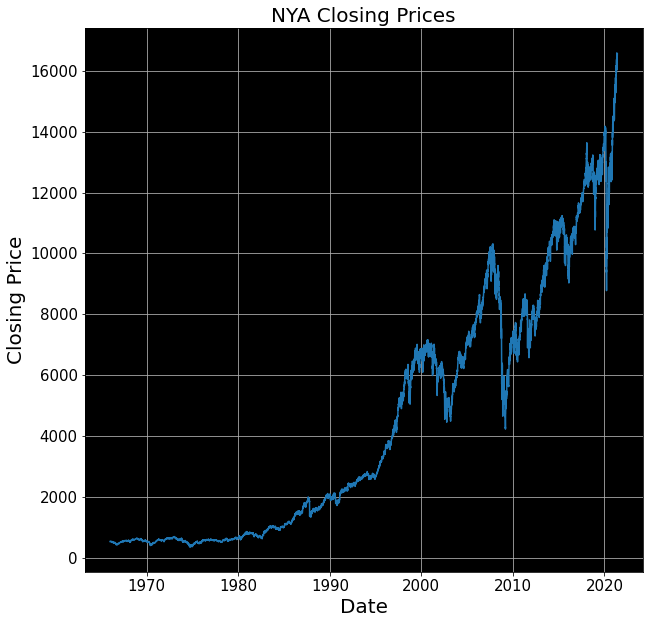

In [91]:
#Use matplotlib and seaborn 
#Resize the plot 
#Add a grid 
plt.figure(figsize = (10,10))
# nya_close = sns.lineplot(data = NYA, x = "Date", y = "Close").set(title = 'NYA Closing Prices')

sns.lineplot(data = NYA, x = "Date", y = "Close").set(title = 'NYA Closing Prices')
#Create a new line that shows the difference between the opening and closing prices 
#Side by side (the first plot is fine) just add a plot to the right that shows the differences 


#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("NYA Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()


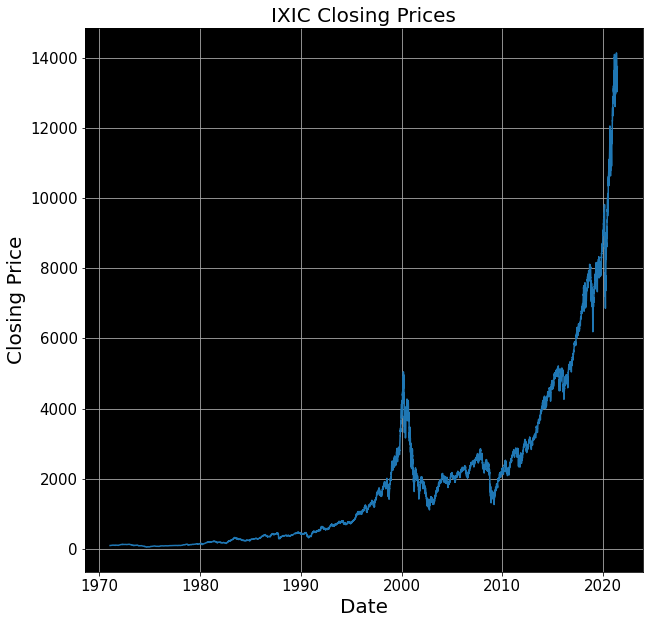

In [92]:
#ixic_close = sns.lineplot(data = IXIC, x = "Date", y = "Close").set(title = 'IXIC Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = IXIC, x = "Date", y = "Close").set(title = 'IXIC Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("IXIC Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

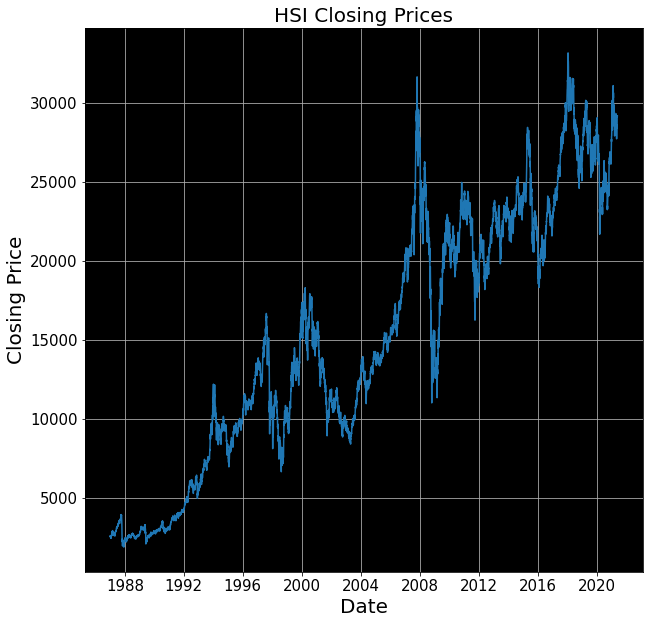

In [93]:
#hsi_close = sns.lineplot(data = HSI, x = "Date", y = "Close").set(title = 'HSI Closing Prices')

plt.figure(figsize = (10,10))
sns.lineplot(data = HSI, x = "Date", y = "Close").set(title = 'HSI Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("HSI Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

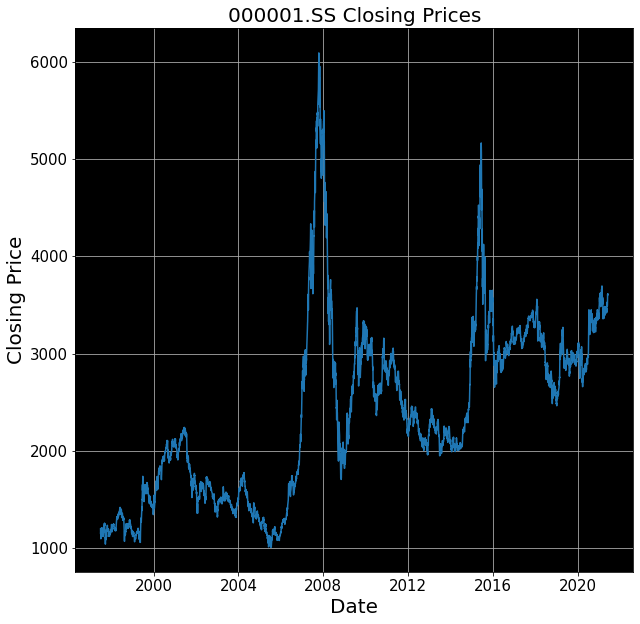

In [94]:
#ss_close = sns.lineplot(data = SS, x = "Date", y = "Close").set(title = '000001.SS Closing Prices')

plt.figure(figsize = (10,10))
sns.lineplot(data = SS, x = "Date", y = "Close").set(title = '000001.SS Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("000001.SS Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

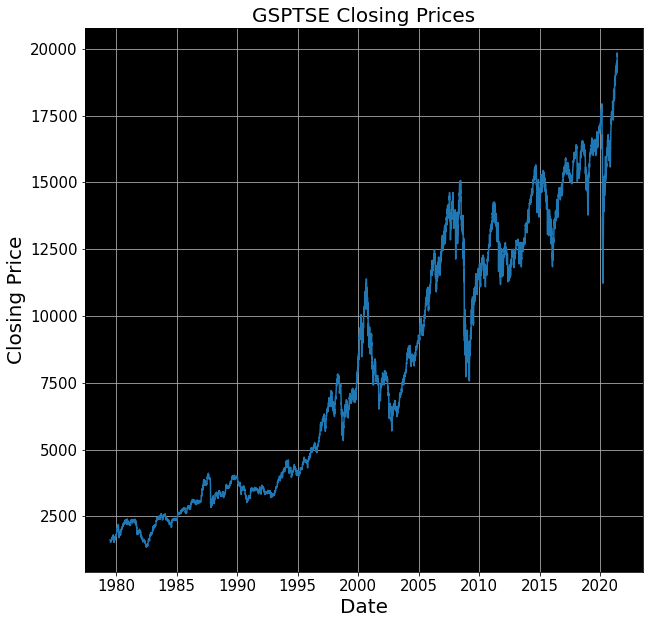

In [95]:
#gsptse_close = sns.lineplot(data = GSPTSE, x = "Date", y = "Close").set(title = 'GSPTSE Closing Prices')

plt.figure(figsize = (10,10))
sns.lineplot(data = GSPTSE, x = "Date", y = "Close").set(title = 'GSPTSE Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("GSPTSE Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

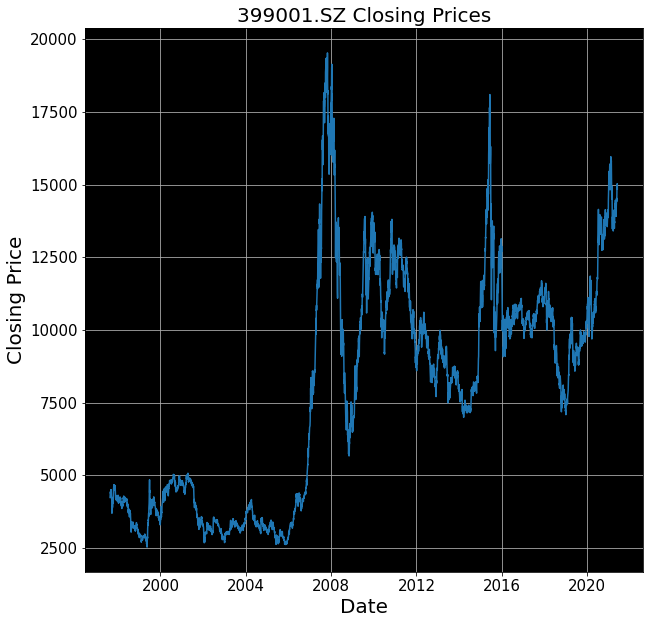

In [96]:
#sz_close = sns.lineplot(data = SZ, x = "Date", y = "Close").set(title = '399001.SZ Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = SZ, x = "Date", y = "Close").set(title = '399001.SZ Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("399001.SZ Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

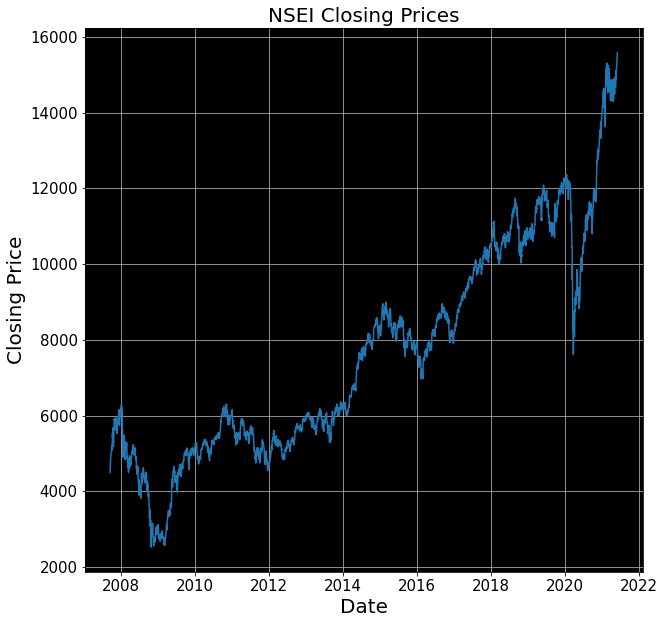

In [97]:
#nsei_close = sns.lineplot(data = NSEI, x = "Date", y = "Close").set(title = 'NSEI Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = NSEI, x = "Date", y = "Close").set(title = 'NSEI Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("NSEI Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

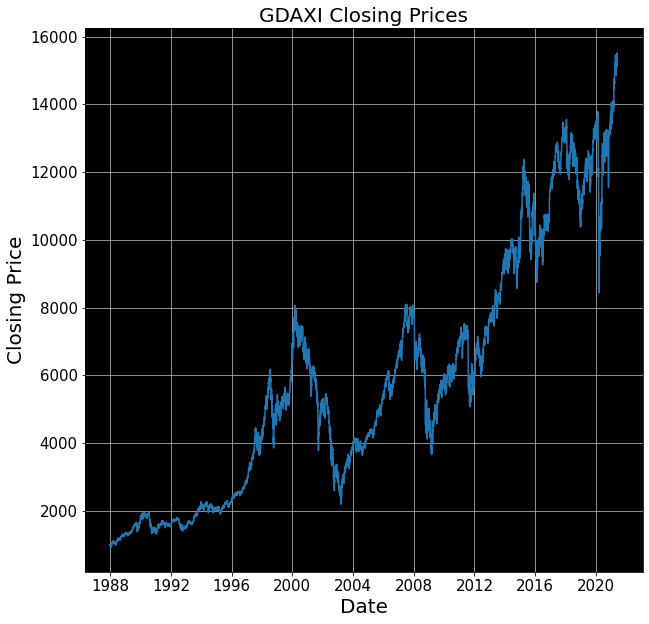

In [98]:
#gdaxi_close = sns.lineplot(data = GDAXI, x = "Date", y = "Close").set(title = 'GDAXI Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = GDAXI, x = "Date", y = "Close").set(title = 'GDAXI Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("GDAXI Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

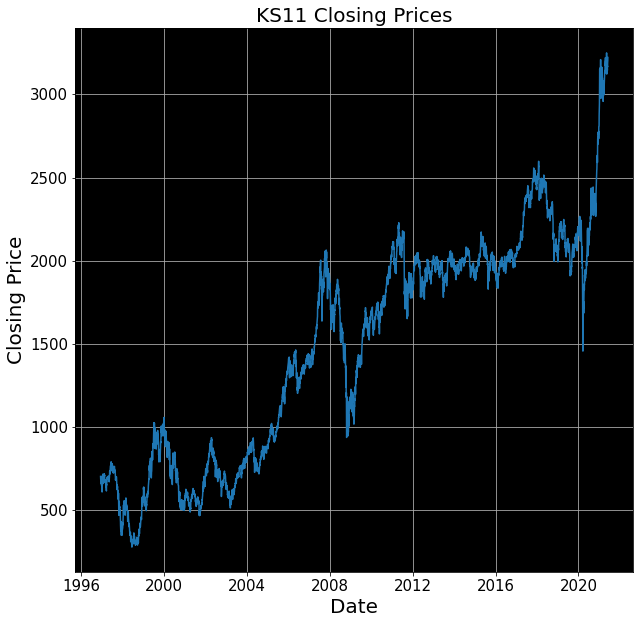

In [99]:
#ks11_close = sns.lineplot(data = KS11, x = "Date", y = "Close").set(title = 'KS11 Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = KS11, x = "Date", y = "Close").set(title = 'KS11 Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("KS11 Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

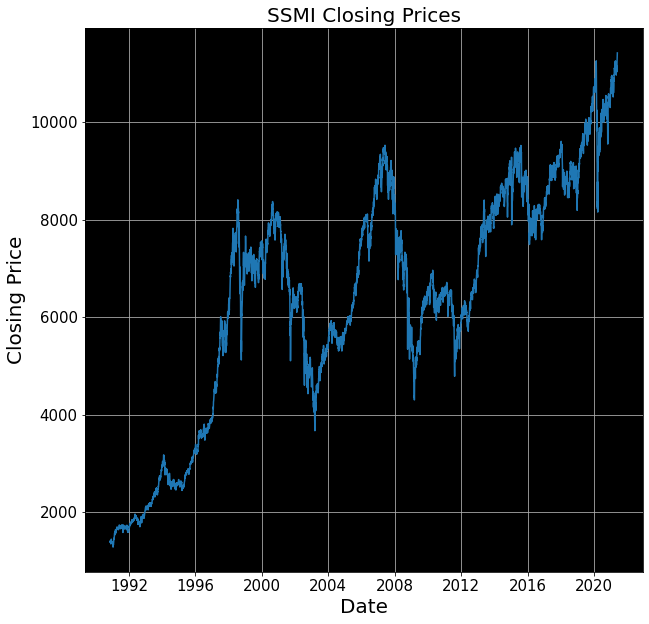

In [100]:
#ssmi_close = sns.lineplot(data = SSMI, x = "Date", y = "Close").set(title = 'SSMI Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = SSMI, x = "Date", y = "Close").set(title = 'SSMI Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("SSMI Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

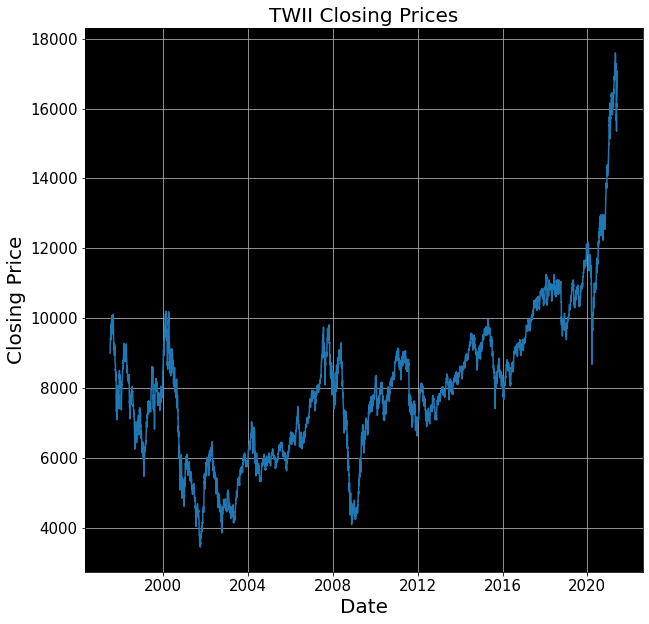

In [101]:
#twii_close = sns.lineplot(data = TWII, x = "Date", y = "Close").set(title = 'TWII Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = TWII, x = "Date", y = "Close").set(title = 'TWII Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("TWII Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

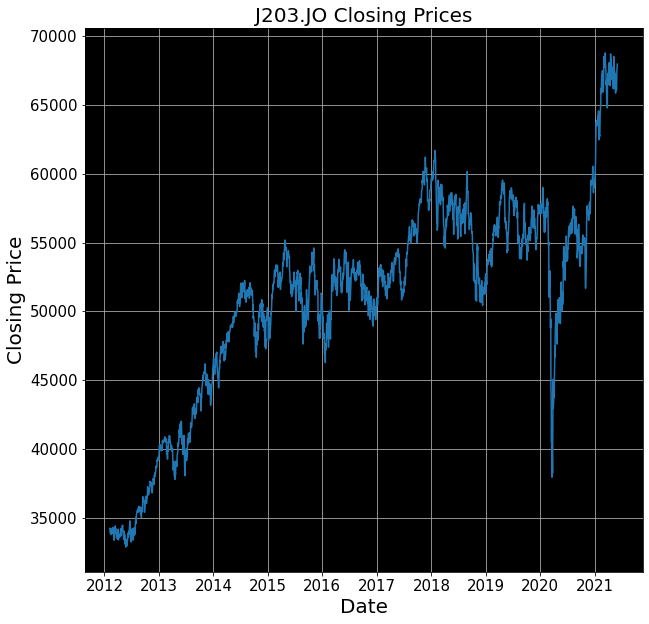

In [102]:
#j203_close = sns.lineplot(data = J203, x = "Date", y = "Close").set(title = 'J203.JO Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = J203, x = "Date", y = "Close").set(title = 'J203.JO Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("J203.JO Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

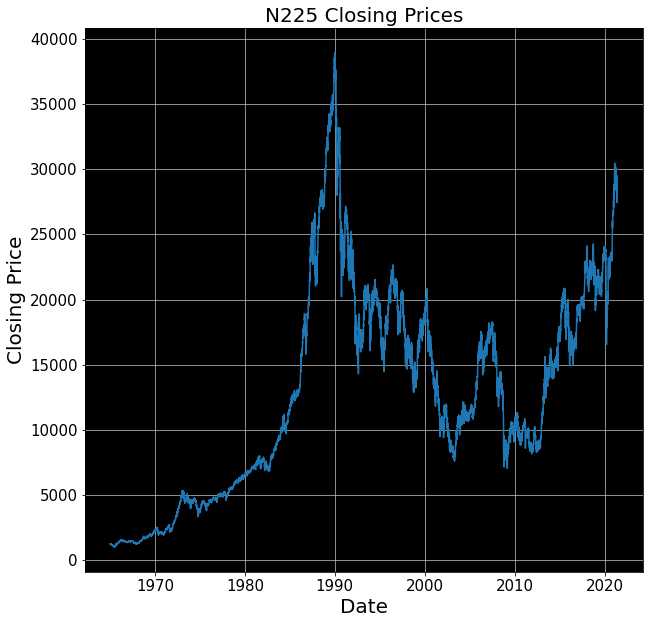

In [103]:
#n225_close = sns.lineplot(data = N225, x = "Date", y = "Close").set(title = 'N225 Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = N225, x = "Date", y = "Close").set(title = 'N225 Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("N225 Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

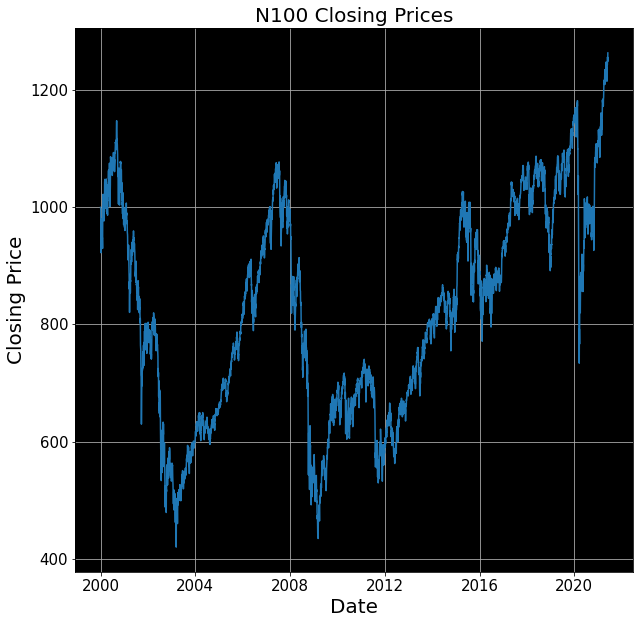

In [104]:
#n100_close = sns.lineplot(data = N100, x = "Date", y = "Close").set(title = 'N100 Closing Prices')
plt.figure(figsize = (10,10))
sns.lineplot(data = N100, x = "Date", y = "Close").set(title = 'N100 Closing Prices')

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("N100 Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

# STEP 4: SEPARATE INDIVIDUAL STOCK DATA BY QUARTERS AND VISUALIZE

In [105]:
nya_q1 = stock[(stock['Index'] == 'NYA') & (stock['quarter'].dt.quarter.isin([1]))]
nya_q2 = stock[(stock['Index'] == 'NYA') & (stock['quarter'].dt.quarter.isin([2]))]
nya_q3 = stock[(stock['Index'] == 'NYA') & (stock['quarter'].dt.quarter.isin([3]))]
nya_q4 = stock[(stock['Index'] == 'NYA') & (stock['quarter'].dt.quarter.isin([4]))]

ixic_q1 = stock[(stock['Index'] == 'IXIC') & (stock['quarter'].dt.quarter.isin([1]))]
ixic_q2 = stock[(stock['Index'] == 'IXIC') & (stock['quarter'].dt.quarter.isin([2]))]
ixic_q3 = stock[(stock['Index'] == 'IXIC') & (stock['quarter'].dt.quarter.isin([3]))]
ixic_q4 = stock[(stock['Index'] == 'IXIC') & (stock['quarter'].dt.quarter.isin([4]))]

hsi_q1 = stock[(stock['Index'] == 'HSI') & (stock['quarter'].dt.quarter.isin([1]))]
hsi_q2 = stock[(stock['Index'] == 'HSI') & (stock['quarter'].dt.quarter.isin([2]))]
hsi_q3 = stock[(stock['Index'] == 'HSI') & (stock['quarter'].dt.quarter.isin([3]))]
hsi_q4 = stock[(stock['Index'] == 'HSI') & (stock['quarter'].dt.quarter.isin([4]))]

ss_q1 = stock[(stock['Index'] == '000001.SS') & (stock['quarter'].dt.quarter.isin([1]))]
ss_q2 = stock[(stock['Index'] == '000001.SS') & (stock['quarter'].dt.quarter.isin([2]))]
ss_q3 = stock[(stock['Index'] == '000001.SS') & (stock['quarter'].dt.quarter.isin([3]))]
ss_q4 = stock[(stock['Index'] == '000001.SS') & (stock['quarter'].dt.quarter.isin([4]))]

gsptse_q1 = stock[(stock['Index'] == 'GSPTSE') & (stock['quarter'].dt.quarter.isin([1]))]
gsptse_q2 = stock[(stock['Index'] == 'GSPTSE') & (stock['quarter'].dt.quarter.isin([2]))]
gsptse_q3 = stock[(stock['Index'] == 'GSPTSE') & (stock['quarter'].dt.quarter.isin([3]))]
gsptse_q4 = stock[(stock['Index'] == 'GSPTSE') & (stock['quarter'].dt.quarter.isin([4]))]

sz_q1 = stock[(stock['Index'] == '399001.SZ') & (stock['quarter'].dt.quarter.isin([1]))]
sz_q2 = stock[(stock['Index'] == '399001.SZ') & (stock['quarter'].dt.quarter.isin([2]))]
sz_q3 = stock[(stock['Index'] == '399001.SZ') & (stock['quarter'].dt.quarter.isin([3]))]
sz_q4 = stock[(stock['Index'] == '399001.SZ') & (stock['quarter'].dt.quarter.isin([4]))]

nsei_q1 = stock[(stock['Index'] == 'NSEI') & (stock['quarter'].dt.quarter.isin([1]))]
nsei_q2 = stock[(stock['Index'] == 'NSEI') & (stock['quarter'].dt.quarter.isin([2]))]
nsei_q3 = stock[(stock['Index'] == 'NSEI') & (stock['quarter'].dt.quarter.isin([3]))]
nsei_q4 = stock[(stock['Index'] == 'NSEI') & (stock['quarter'].dt.quarter.isin([4]))]

gdaxi_q1 = stock[(stock['Index'] == 'GDAXI') & (stock['quarter'].dt.quarter.isin([1]))]
gdaxi_q2 = stock[(stock['Index'] == 'GDAXI') & (stock['quarter'].dt.quarter.isin([2]))]
gdaxi_q3 = stock[(stock['Index'] == 'GDAXI') & (stock['quarter'].dt.quarter.isin([3]))]
gdaxi_q4 = stock[(stock['Index'] == 'GDAXI') & (stock['quarter'].dt.quarter.isin([4]))]

ks11_q1 = stock[(stock['Index'] == 'KS11') & (stock['quarter'].dt.quarter.isin([1]))]
ks11_q2 = stock[(stock['Index'] == 'KS11') & (stock['quarter'].dt.quarter.isin([2]))]
ks11_q3 = stock[(stock['Index'] == 'KS11') & (stock['quarter'].dt.quarter.isin([3]))]
ks11_q4 = stock[(stock['Index'] == 'KS11') & (stock['quarter'].dt.quarter.isin([4]))]

ssmi_q1 = stock[(stock['Index'] == 'SSMI') & (stock['quarter'].dt.quarter.isin([1]))]
ssmi_q2 = stock[(stock['Index'] == 'SSMI') & (stock['quarter'].dt.quarter.isin([2]))]
ssmi_q3 = stock[(stock['Index'] == 'SSMI') & (stock['quarter'].dt.quarter.isin([3]))]
ssmi_q4 = stock[(stock['Index'] == 'SSMI') & (stock['quarter'].dt.quarter.isin([4]))]

twii_q1 = stock[(stock['Index'] == 'TWII') & (stock['quarter'].dt.quarter.isin([1]))]
twii_q2 = stock[(stock['Index'] == 'TWII') & (stock['quarter'].dt.quarter.isin([2]))]
twii_q3 = stock[(stock['Index'] == 'TWII') & (stock['quarter'].dt.quarter.isin([3]))]
twii_q4 = stock[(stock['Index'] == 'TWII') & (stock['quarter'].dt.quarter.isin([4]))]

j203_q1 = stock[(stock['Index'] == 'J203.JO') & (stock['quarter'].dt.quarter.isin([1]))]
j203_q2 = stock[(stock['Index'] == 'J203.JO') & (stock['quarter'].dt.quarter.isin([2]))]
j203_q3 = stock[(stock['Index'] == 'J203.JO') & (stock['quarter'].dt.quarter.isin([3]))]
j203_q4 = stock[(stock['Index'] == 'J203.JO') & (stock['quarter'].dt.quarter.isin([4]))]

n225_q1 = stock[(stock['Index'] == 'N225') & (stock['quarter'].dt.quarter.isin([1]))]
n225_q2 = stock[(stock['Index'] == 'N225') & (stock['quarter'].dt.quarter.isin([2]))]
n225_q3 = stock[(stock['Index'] == 'N225') & (stock['quarter'].dt.quarter.isin([3]))]
n225_q4 = stock[(stock['Index'] == 'N225') & (stock['quarter'].dt.quarter.isin([4]))]

n100_q1 = stock[(stock['Index'] == 'N100') & (stock['quarter'].dt.quarter.isin([1]))]
n100_q2 = stock[(stock['Index'] == 'N100') & (stock['quarter'].dt.quarter.isin([2]))]
n100_q3 = stock[(stock['Index'] == 'N100') & (stock['quarter'].dt.quarter.isin([3]))]
n100_q4 = stock[(stock['Index'] == 'N100') & (stock['quarter'].dt.quarter.isin([4]))]


,Index,Date,Open,High,Low,Close,Adj Close,Volume,quarter,Diff
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00,1966Q1,0.00000
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00,1966Q1,0.00000
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00,1966Q1,0.00000
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00,1966Q1,0.00000
5,NYA,1966-01-07,532.599976,532.599976,532.599976,532.599976,532.599976,0.000000e+00,1966Q1,0.00000
...,...,...,...,...,...,...,...,...,...,...
13902,NYA,2021-03-25,15276.559570,15439.089840,15138.690430,15410.370120,15410.370120,4.940800e+09,2021Q1,-133.81055
13903,NYA,2021-03-26,15410.370120,15687.179690,15410.370120,15682.540040,15682.540040,5.467850e+09,2021Q1,-272.16992
13904,NYA,2021-03-29,15682.540040,15682.540040,15522.660160,15611.879880,15611.879880,4.619840e+09,2021Q1,70.66016
13905,NYA,2021-03-30,15611.879880,15663.009770,15551.530270,15626.110350,15626.110350,4.103570e+09,2021Q1,-14.23047


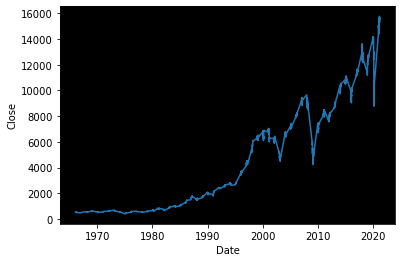

In [106]:
sns.lineplot(data = nya_q1, x = 'Date', y = 'Close')
nya_q1

# STEP 5: PREDICT FUTURE STOCK PRICE USING 4 DIFFERENT FORECASTING METHODS 
#### (TOMORROW, NEXT WEEK, NEXT MONTH, NEXT QUARTER, NEXT YEAR)
* EX: SINGLE EXPONENTIAL SMOOTHING 
* DEFINE WHAT SINGLE EXPONENTIAL SMOOTHING IS (HERE)


In [107]:
#DO IT HERE 
NYA['MA50'] = NYA['Open'].rolling(50).mean()
NYA['MA200'] = NYA['Open'].rolling(200).mean()
NYA

C:\Users\hnjac\AppData\Local\Temp/ipykernel_9148/2552864437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYA['MA50'] = NYA['Open'].rolling(50).mean()
C:\Users\hnjac\AppData\Local\Temp/ipykernel_9148/2552864437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYA['MA200'] = NYA['Open'].rolling(200).mean()


,Index,Date,Open,High,Low,Close,Adj Close,Volume,quarter,Diff,MA50,MA200
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,1965Q4,0.00000,NaN,NaN
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00,1966Q1,0.00000,NaN,NaN
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00,1966Q1,0.00000,NaN,NaN
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00,1966Q1,0.00000,NaN,NaN
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00,1966Q1,0.00000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09,2021Q2,-89.68945,16013.248203,14434.544703
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09,2021Q2,74.50000,16028.237793,14453.589649
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09,2021Q2,-61.77149,16040.531582,14471.551695
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09,2021Q2,-79.98828,16056.184805,14488.829351


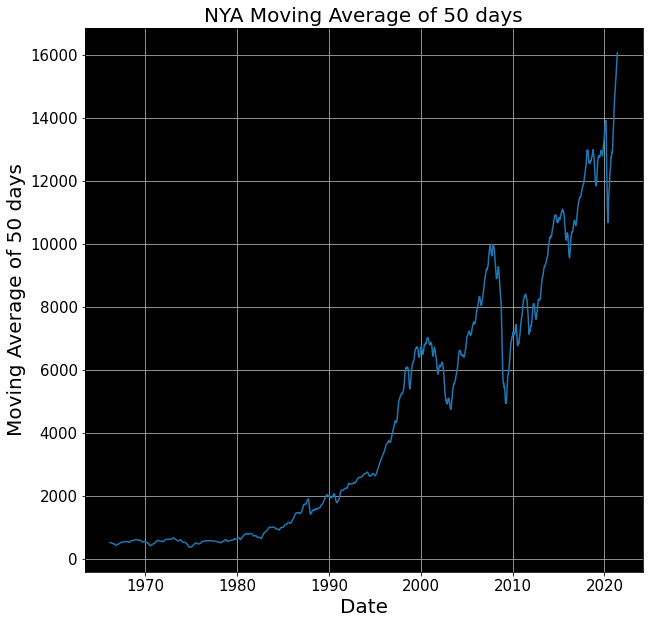

In [108]:

plt.figure(figsize = (10,10))
sns.lineplot(data = NYA, x = "Date", y = "MA50")

#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Moving Average of 50 days', fontsize = 20)
plt.title("NYA Moving Average of 50 days", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

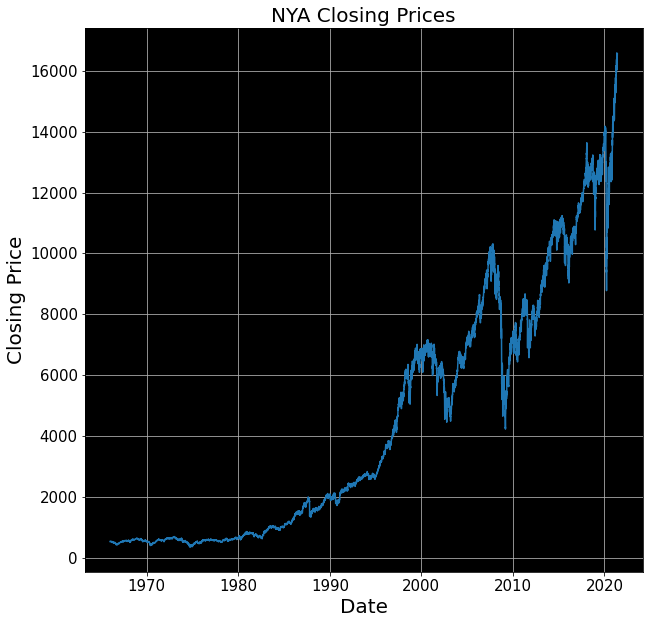

In [109]:
plt.figure(figsize = (10,10))
# nya_close = sns.lineplot(data = NYA, x = "Date", y = "Close").set(title = 'NYA Closing Prices')

sns.lineplot(data = NYA, x = "Date", y = "Close").set(title = 'NYA Closing Prices')
#Create a new line that shows the difference between the opening and closing prices 
#Side by side (the first plot is fine) just add a plot to the right that shows the differences 


#Make Axis labels larger 
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.title("NYA Closing Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#Add a legend when comparing the two plots 
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

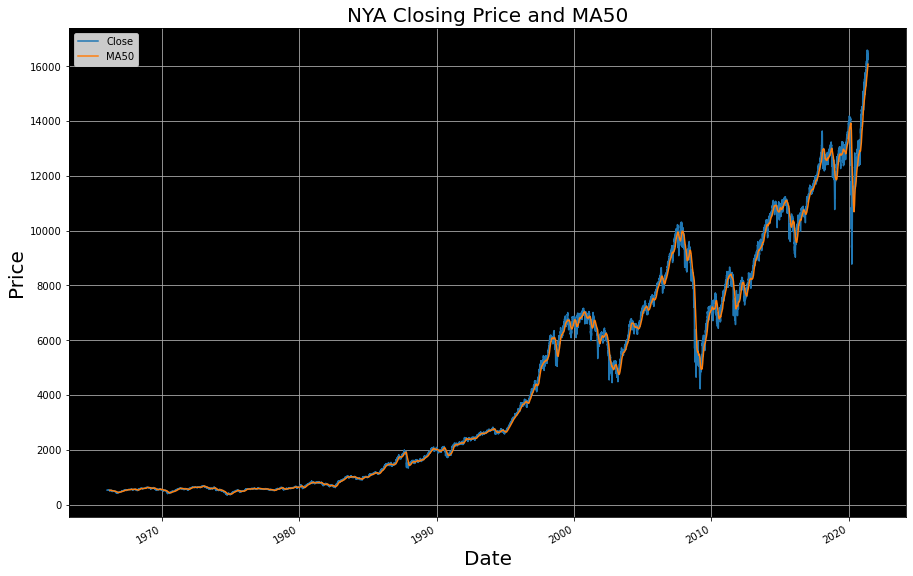

In [112]:
plt.figure(facecolor = 'black')
NYA.plot(x = 'Date', y = ['Close', 'MA50'], figsize = (15,10), grid = True)
# TODO: restrict datetime to year 2000

# plt.errorbar(x = 'Date', y = 'MA50')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.title('NYA Closing Price and MA50', fontsize = 20)
plt.legend(facecolor = 'white');
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Volume'>

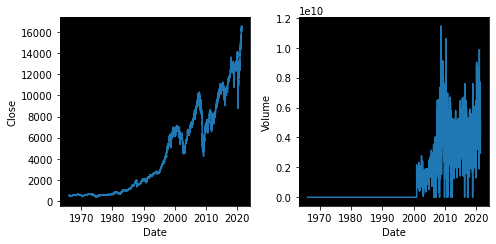

In [126]:
fig, axes = plt.subplots(1,2)
# ax[0].plot(NYA['Date'], NYA['Close'])
# ax[1].plot(NYA['Date'], NYA['Volume'])
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.lineplot(x = NYA['Date'], y = NYA['Close'], ax = axes[0])
sns.lineplot(x = NYA['Date'], y = NYA['Volume'], ax = axes[1])

# STEP 6: CONCLUSION
* SUMMARIZE FINDINGS, WHICH FORECASTING METHOD IS THE BEST
* ERROR ANALYSIS (ERROR METRICS)/ ERROR BIAS / etc. 